## Project on Aviation Delays
***

For this notebook, I downloaded a U.S. Department of Transportation, Bureau of Transportation Statistics (BTS) dataset published by IBM (https://developer.ibm.com/exchanges/data/all/airline/). The dataset is a 2 million record sample of a 200 million record, full dataset (1987-2020).

The project focused on **departure delays**, as these can have the broadest impact on consumers, as opposed to outright flight cancellations.

The key questions that I wanted to address in the project:

* System-wide departure delay trends for the last 10 years of the last sample
* Departure delay trends as related to current major airlines and airports.

The **steps** to conduct my analysis are summarized below.
***

#### 1. Import libraries and ensure a proper mapping path for the original and post-analysis datasets. ####

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import plotly.express as px
import plotly.graph_objects as go

In [5]:
working_directory = os.getcwd()
print(working_directory)
path = working_directory + '/airline_2m.csv'
df_airlines = pd.read_csv(path, encoding='ISO-8859-1')

/Users/timothyrosado/Documents/Python


/var/folders/69/sv0k81_x7v56s5583_vg3yqr0000gn/T/ipykernel_48607/3091379609.py:4: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  df_airlines = pd.read_csv(path, encoding='ISO-8859-1')


### Wrangle & Organize the Dataset

***
#### 2. Reduce the scope of the dataframe by dropping some of the unnecessary columns. ####

In [6]:
df_airlines1 = df_airlines.drop(df_airlines.columns[[7, 21, 22, 28]],axis = 1)
df_airlines1 = df_airlines1.drop(df_airlines1.iloc[:, 61:106],axis = 1)

In [7]:
df_airlines1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 61 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Year                             int64  
 1   Quarter                          int64  
 2   Month                            int64  
 3   DayofMonth                       int64  
 4   DayOfWeek                        int64  
 5   FlightDate                       object 
 6   Reporting_Airline                object 
 7   IATA_CODE_Reporting_Airline      object 
 8   Tail_Number                      object 
 9   Flight_Number_Reporting_Airline  int64  
 10  OriginAirportID                  int64  
 11  OriginAirportSeqID               int64  
 12  OriginCityMarketID               int64  
 13  Origin                           object 
 14  OriginCityName                   object 
 15  OriginState                      object 
 16  OriginStateFips                  float64
 17  OriginSt

***
#### 3. Determine the appropriate columns of focus. These include: ####

<blockquote>Year, Month</blockquote>
<blockquote>DayOfMonth, DayOfWeek</blockquote>
<blockquote>Reporting_Airline (i.e., airline code identification)</blockquote>
<blockquote>OriginAirportID (i.e, airport code identification)</blockquote>
<blockquote>DepDelayMinutes, ArrDelayMinutes</blockquote>

***
#### 4. Take a system-wide, initial look at delays by year. Include arrival delays for initial analysis purposes. ####

In [8]:
df_airlines2 = df_airlines1.groupby(['Year'])
df_airlines2 = df_airlines2[["DepDelayMinutes","ArrDelayMinutes"]].mean()
df_airlines2.round(decimals = 0)

,DepDelayMinutes,ArrDelayMinutes
Year,,
1987,9.0,12.0
1988,7.0,10.0
1989,9.0,11.0
1990,7.0,10.0
1991,7.0,9.0
1992,6.0,8.0
1993,7.0,9.0
1994,7.0,9.0
1995,9.0,10.0


***
#### 5. Establish if there is a relationship between departure delays and arrival delays system wide. ####

The plot chart below indicates a close relationship. A close relationsip suggest that departure delays generally lead to arrival delays on a system-wide basis; meaning, departure delays can lead to an overall delay and, in general, are not made up on the back end of a flight. This conclusion helps establish the basis for my focus on departure delays for the remainder of this analysis. (Note: this is a system-wide conclusion; departure delays for some/many flights may be mitgated by in-flight conditions & actions that can speed up arrival times).

Text(0.5, 1.0, 'Departure Delays vs. Arrival Delays')

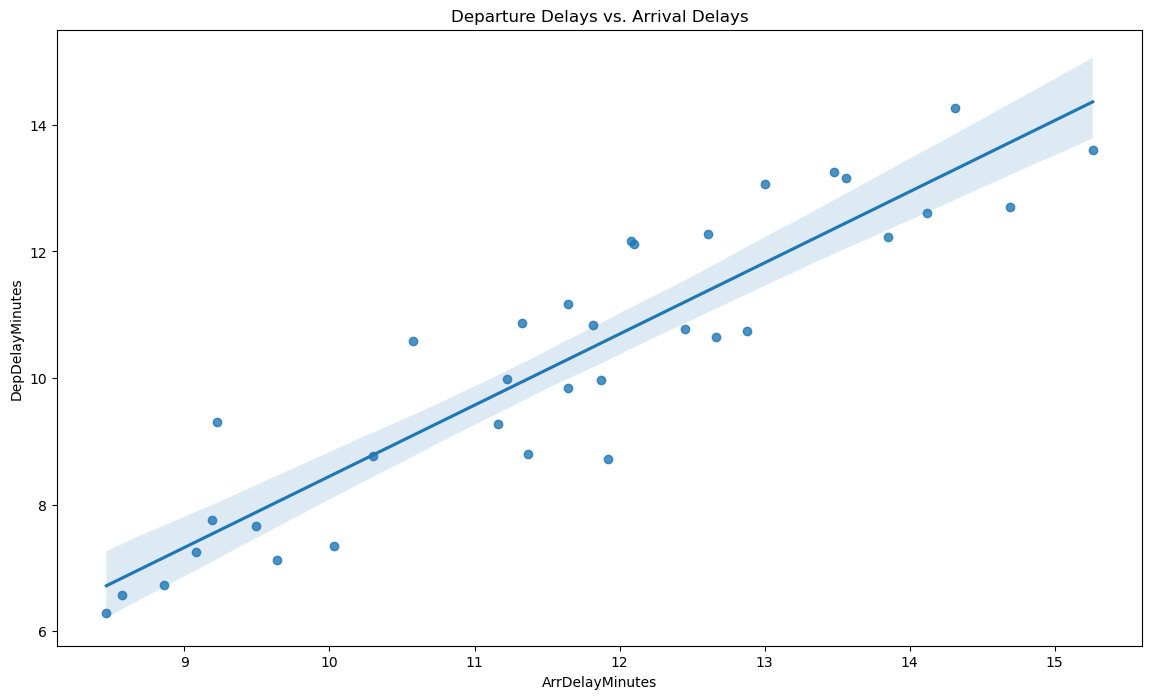

In [9]:
plt.figure(figsize=(14,8))
sns.regplot(x=df_airlines2["ArrDelayMinutes"], y=df_airlines2["DepDelayMinutes"])
plt.title('Departure Delays vs. Arrival Delays')

***
#### 6. Focus the dataframe on specific major airlines that operate currently. ####

In [10]:
df_airlines2 = df_airlines1[df_airlines1['Reporting_Airline'].isin(['AA', 'DL','WN','UA','AS', 'B6',\
                                                                              'NK','F9','OO','HA'])]
df_airlines2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings
3,2010,3,8,31,2,2010-08-31,DL,DL,N6705Y,1806,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
5,1995,4,11,29,3,1995-11-29,DL,DL,N925DL,1198,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2018,1,2,8,4,2018-02-08,WN,WN,N8688J,5932,...,4,0.0,0.0,13.0,0.0,16.0,NaN,NaN,NaN,0.0
11,2014,2,4,3,4,2014-04-03,WN,WN,N374SW,1463,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
12,1994,3,7,24,7,1994-07-24,AA,AA,NaN,830,...,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


***
#### 7. Limit the data to the last 10 years of the dataset, as this will keep most data out of the dataset tied to airlines that are either no longer in operation or are combined with the operations of airline operating today. ####

In [11]:
df_airlines2 = df_airlines2.loc[(df_airlines2['Year'] >= 2010)]
df_airlines2.reset_index(drop=True)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,...,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings
0,2010,3,8,31,2,2010-08-31,DL,DL,N6705Y,1806,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2018,1,2,8,4,2018-02-08,WN,WN,N8688J,5932,...,4,0.0,0.0,13.0,0.0,16.0,NaN,NaN,NaN,0.0
2,2014,2,4,3,4,2014-04-03,WN,WN,N374SW,1463,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2013,2,6,30,7,2013-06-30,OO,OO,N947SW,6474,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2015,3,9,5,6,2015-09-05,AS,AS,N589AS,413,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491738,2016,3,7,6,3,2016-07-06,UA,UA,N37465,1581,...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
491739,2014,1,1,27,1,2014-01-27,DL,DL,N378DA,1933,...,8,0.0,0.0,24.0,0.0,0.0,NaN,NaN,NaN,0.0
491740,2018,1,2,27,2,2018-02-27,B6,B6,N323JB,2807,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
491741,2017,4,12,27,3,2017-12-27,DL,DL,N956DN,1871,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


***
#### 8. Further narrow the dataframe to selected columns most relevant to the core analysis. ####

In [27]:
df_airlinesA = df_airlines2[['Reporting_Airline', 'Year', 'Month', 'DayOfWeek',\
                             'Origin','DepDelayMinutes', 'TaxiOut', 'Distance']].copy()
df_airlinesA.reset_index(drop=True)

,Reporting_Airline,Year,Month,DayOfWeek,Origin,DepDelayMinutes,TaxiOut,Distance
0,DL,2010,8,2,LAX,0.0,23.0,1979.0
1,WN,2018,2,4,MDW,16.0,34.0,793.0
2,WN,2014,4,4,ELP,0.0,10.0,562.0
3,OO,2013,6,7,ABQ,0.0,6.0,677.0
4,AS,2015,9,6,SLC,0.0,9.0,689.0
...,...,...,...,...,...,...,...,...
491738,UA,2016,7,3,SFO,0.0,15.0,2398.0
491739,DL,2014,1,1,CVG,0.0,11.0,1900.0
491740,B6,2018,2,2,PWM,0.0,18.0,273.0
491741,DL,2017,12,3,ATL,0.0,11.0,874.0


In [28]:
# improve column title names

df_airlinesA.columns.values[0:8] =["Airline", "Year", "Month", "WeekDay", "Airport", "DelayTime",\
                                   "TaxiTime", "FlightDistance"]
df_airlinesA

,Airline,Year,Month,WeekDay,Airport,DelayTime,TaxiTime,FlightDistance
3,DL,2010,8,2,LAX,0.0,23.0,1979.0
9,WN,2018,2,4,MDW,16.0,34.0,793.0
11,WN,2014,4,4,ELP,0.0,10.0,562.0
13,OO,2013,6,7,ABQ,0.0,6.0,677.0
17,AS,2015,9,6,SLC,0.0,9.0,689.0
...,...,...,...,...,...,...,...,...
1999978,UA,2016,7,3,SFO,0.0,15.0,2398.0
1999980,DL,2014,1,1,CVG,0.0,11.0,1900.0
1999991,B6,2018,2,2,PWM,0.0,18.0,273.0
1999994,DL,2017,12,3,ATL,0.0,11.0,874.0


In [29]:
df_airlinesA.reset_index(drop=True)

,Airline,Year,Month,WeekDay,Airport,DelayTime,TaxiTime,FlightDistance
0,DL,2010,8,2,LAX,0.0,23.0,1979.0
1,WN,2018,2,4,MDW,16.0,34.0,793.0
2,WN,2014,4,4,ELP,0.0,10.0,562.0
3,OO,2013,6,7,ABQ,0.0,6.0,677.0
4,AS,2015,9,6,SLC,0.0,9.0,689.0
...,...,...,...,...,...,...,...,...
491738,UA,2016,7,3,SFO,0.0,15.0,2398.0
491739,DL,2014,1,1,CVG,0.0,11.0,1900.0
491740,B6,2018,2,2,PWM,0.0,18.0,273.0
491741,DL,2017,12,3,ATL,0.0,11.0,874.0


In [32]:
# save changes to file

df_airlinesA.to_csv('AirlinesDAT.csv')

In [33]:
working_directory = os.getcwd()
path = working_directory + '/AirlinesDAT.csv'
df_airlinesA = pd.read_csv(path, encoding='ISO-8859-1')

In [34]:
# check updated file/dataframe.
df_airlinesA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491743 entries, 0 to 491742
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      491743 non-null  int64  
 1   Airline         491743 non-null  object 
 2   Year            491743 non-null  int64  
 3   Month           491743 non-null  int64  
 4   WeekDay         491743 non-null  int64  
 5   Airport         491743 non-null  object 
 6   DelayTime       484723 non-null  float64
 7   TaxiTime        484564 non-null  float64
 8   FlightDistance  491743 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 33.8+ MB


***
#### 9. Insert column that will help count the number of flight delays, in order to facilitate the calculation of flight percentages that are delayed by airline and airport. #### 

In [35]:
df_airlinesA['DelayCount'] = np.where(df_airlinesA['DelayTime']>0,1,0)
df_airlinesA.reset_index(drop=True)

,Unnamed: 0,Airline,Year,Month,WeekDay,Airport,DelayTime,TaxiTime,FlightDistance,DelayCount
0,3,DL,2010,8,2,LAX,0.0,23.0,1979.0,0
1,9,WN,2018,2,4,MDW,16.0,34.0,793.0,1
2,11,WN,2014,4,4,ELP,0.0,10.0,562.0,0
3,13,OO,2013,6,7,ABQ,0.0,6.0,677.0,0
4,17,AS,2015,9,6,SLC,0.0,9.0,689.0,0
...,...,...,...,...,...,...,...,...,...,...
491738,1999978,UA,2016,7,3,SFO,0.0,15.0,2398.0,0
491739,1999980,DL,2014,1,1,CVG,0.0,11.0,1900.0,0
491740,1999991,B6,2018,2,2,PWM,0.0,18.0,273.0,0
491741,1999994,DL,2017,12,3,ATL,0.0,11.0,874.0,0


In [36]:
# replace "0"s with "NAN"

df_airlinesA.replace(0, np.nan, inplace=True)
df_airlinesA.reset_index(drop=True)

,Unnamed: 0,Airline,Year,Month,WeekDay,Airport,DelayTime,TaxiTime,FlightDistance,DelayCount
0,3,DL,2010,8,2,LAX,NaN,23.0,1979.0,NaN
1,9,WN,2018,2,4,MDW,16.0,34.0,793.0,1.0
2,11,WN,2014,4,4,ELP,NaN,10.0,562.0,NaN
3,13,OO,2013,6,7,ABQ,NaN,6.0,677.0,NaN
4,17,AS,2015,9,6,SLC,NaN,9.0,689.0,NaN
...,...,...,...,...,...,...,...,...,...,...
491738,1999978,UA,2016,7,3,SFO,NaN,15.0,2398.0,NaN
491739,1999980,DL,2014,1,1,CVG,NaN,11.0,1900.0,NaN
491740,1999991,B6,2018,2,2,PWM,NaN,18.0,273.0,NaN
491741,1999994,DL,2017,12,3,ATL,NaN,11.0,874.0,NaN


## Explore/Assemble the Data

***
#### 10. Assemble data encompassing percentages of flights delayed, and average delays, by airlines and top airports, by year. ####

In [78]:
df = pd.DataFrame(df_airlinesA)

In [107]:
# calculate number of flights, by year, by airline

df_airlinesCP = df_airlinesA.groupby(['Airline','Year'])['Airline'].count().reset_index(name="FlightCount")
df_airlinesCP.reset_index(drop=True)

,Airline,Year,FlightCount
0,AA,2010,5527
1,AA,2011,5485
2,AA,2012,5282
3,AA,2013,5410
4,AA,2014,5530
...,...,...,...
100,WN,2016,13384
101,WN,2017,13814
102,WN,2018,13900
103,WN,2019,13972


In [88]:
# calculate nunber of delays, by year, by airline

df = pd.DataFrame(df_airlinesCP)
df_airlinesCP1 = df_airlinesA.groupby(['Airline','Year'])['DelayCount'].count().reset_index(name="DelayN")
df_airlinesCP1.reset_index(drop=True)

,Airline,Year,DelayN
0,AA,2010,2070
1,AA,2011,2049
2,AA,2012,2018
3,AA,2013,2276
4,AA,2014,2159
...,...,...,...
100,WN,2016,5674
101,WN,2017,6413
102,WN,2018,6819
103,WN,2019,6343


In [165]:
# merge the dataframes

df_airlinesCP2 = pd.merge(df_airlinesCP, df_airlinesCP1, on=['Airline',  'Year'])
df_airlinesCP2

,Airline,Year,FlightCount,DelayN
0,AA,2010,5527,2070
1,AA,2011,5485,2049
2,AA,2012,5282,2018
3,AA,2013,5410,2276
4,AA,2014,5530,2159
...,...,...,...,...
100,WN,2016,13384,5674
101,WN,2017,13814,6413
102,WN,2018,13900,6819
103,WN,2019,13972,6343


In [169]:
# calculate flights delayed by airline

df_airlinesCP2['Delayed%'] = (df_airlinesCP2['DelayN'] / 
                  df_airlinesCP2['FlightCount'] * 100)
df_airlinesCP2
df_airlinesCP2.round(decimals = 0)

,Airline,Year,FlightCount,DelayN,Delayed%
0,AA,2010,5527,2070,37.0
1,AA,2011,5485,2049,37.0
2,AA,2012,5282,2018,38.0
3,AA,2013,5410,2276,42.0
4,AA,2014,5530,2159,39.0
...,...,...,...,...,...
100,WN,2016,13384,5674,42.0
101,WN,2017,13814,6413,46.0
102,WN,2018,13900,6819,49.0
103,WN,2019,13972,6343,45.0


In [155]:
df = pd.DataFrame(df_airlinesCP2)

In [162]:
# calculate delay time averages by airline and year.

df_airlinesCP3 = df_airlinesA.groupby(['Airline', 'Year'])['DelayTime'].mean().reset_index(name="DelayTimeAve")
df_airlinesCP3.reset_index(drop=True)
df_airlinesCP3.round(decimals = 0)

,Airline,Year,DelayTimeAve
0,AA,2010,31.0
1,AA,2011,30.0
2,AA,2012,32.0
3,AA,2013,29.0
4,AA,2014,35.0
...,...,...,...
100,WN,2016,25.0
101,WN,2017,26.0
102,WN,2018,26.0
103,WN,2019,25.0


In [170]:
df = pd.DataFrame(df_airlinesCP3)

In [172]:
# combine all elements to complete data assembly by AIRLINE

df_airlinesCP4 = pd.merge(df_airlinesCP2, df_airlinesCP3, on=['Airline',  'Year'])
df_airlinesCP4
df_airlinesCP4.round(decimals = 0)

,Airline,Year,FlightCount,DelayN,Delayed%,DelayTimeAve
0,AA,2010,5527,2070,37.0,31.0
1,AA,2011,5485,2049,37.0,30.0
2,AA,2012,5282,2018,38.0,32.0
3,AA,2013,5410,2276,42.0,29.0
4,AA,2014,5530,2159,39.0,35.0
...,...,...,...,...,...,...
100,WN,2016,13384,5674,42.0,25.0
101,WN,2017,13814,6413,46.0,26.0
102,WN,2018,13900,6819,49.0,26.0
103,WN,2019,13972,6343,45.0,25.0


In [340]:
df = pd.DataFrame(df_airlinesCP4)

In [210]:
# Now assemble the same data elements by AIRPORT

# calculate number of flights, by year, by airline

df_airportsCP5 = df_airlinesA.groupby(['Airport','Year'])['Airport'].count().reset_index(name="FlightCount")
df_airportsCP5.reset_index(drop=True)

,Airport,Year,FlightCount
0,ABE,2010,3
1,ABE,2012,1
2,ABE,2013,1
3,ABE,2014,2
4,ABE,2015,3
...,...,...,...
2955,YUM,2016,19
2956,YUM,2017,12
2957,YUM,2018,13
2958,YUM,2019,17


In [212]:
# calculate nunber of delays, by year, by airport

df_airportsCP6 = df_airlinesA.groupby(['Airport','Year'])['DelayCount'].count().reset_index(name="DelayN")
df_airportsCP6.reset_index(drop=True)

,Airport,Year,DelayN
0,ABE,2010,1
1,ABE,2012,0
2,ABE,2013,0
3,ABE,2014,0
4,ABE,2015,1
...,...,...,...
2955,YUM,2016,1
2956,YUM,2017,2
2957,YUM,2018,2
2958,YUM,2019,4


In [214]:
# merge the dataframes

df_airportsCP7 = pd.merge(df_airportsCP5, df_airportsCP6, on=['Airport',  'Year'])
df_airportsCP7

,Airport,Year,FlightCount,DelayN
0,ABE,2010,3,1
1,ABE,2012,1,0
2,ABE,2013,1,0
3,ABE,2014,2,0
4,ABE,2015,3,1
...,...,...,...,...
2955,YUM,2016,19,1
2956,YUM,2017,12,2
2957,YUM,2018,13,2
2958,YUM,2019,17,4


In [216]:
# calculate flights delayed by airport

df_airportsCP7['Delayed%'] = (df_airportsCP7['DelayN'] / 
                  df_airportsCP7['FlightCount'] * 100)
df_airportsCP7
df_airportsCP7.round(decimals = 0)

,Airport,Year,FlightCount,DelayN,Delayed%
0,ABE,2010,3,1,33.0
1,ABE,2012,1,0,0.0
2,ABE,2013,1,0,0.0
3,ABE,2014,2,0,0.0
4,ABE,2015,3,1,33.0
...,...,...,...,...,...
2955,YUM,2016,19,1,5.0
2956,YUM,2017,12,2,17.0
2957,YUM,2018,13,2,15.0
2958,YUM,2019,17,4,24.0


In [217]:
# calculate delay time averages by airport and year.

df_airportsCP8 = df_airlinesA.groupby(['Airport', 'Year'])['DelayTime'].mean().reset_index(name="DelayTimeAve")
df_airportsCP8.reset_index(drop=True)
df_airportsCP8.round(decimals = 0)

,Airport,Year,DelayTimeAve
0,ABE,2010,14.0
1,ABE,2012,NaN
2,ABE,2013,NaN
3,ABE,2014,NaN
4,ABE,2015,4.0
...,...,...,...
2955,YUM,2016,7.0
2956,YUM,2017,4.0
2957,YUM,2018,114.0
2958,YUM,2019,42.0


In [242]:
# combine all elements for AIRPORTS

df_airportsCP9 = pd.merge(df_airportsCP7, df_airportsCP8, on=['Airport',  'Year'])
df_airportsCP9
df_airportsCP9.round(decimals = 0)

,Airport,Year,FlightCount,DelayN,Delayed%,DelayTimeAve
0,ABE,2010,3,1,33.0,14.0
1,ABE,2012,1,0,0.0,NaN
2,ABE,2013,1,0,0.0,NaN
3,ABE,2014,2,0,0.0,NaN
4,ABE,2015,3,1,33.0,4.0
...,...,...,...,...,...,...
2955,YUM,2016,19,1,5.0,7.0
2956,YUM,2017,12,2,17.0,4.0
2957,YUM,2018,13,2,15.0,114.0
2958,YUM,2019,17,4,24.0,42.0


In [244]:
df_airportsCP9.reset_index(inplace=True)

In [255]:
df = pd.DataFrame(df_airportsCP9)
df_airportsCP9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2960 entries, 0 to 2959
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2960 non-null   int64  
 1   Airport       2960 non-null   object 
 2   Year          2960 non-null   int64  
 3   FlightCount   2960 non-null   int64  
 4   DelayN        2960 non-null   int64  
 5   Delayed%      2960 non-null   float64
 6   DelayTimeAve  2621 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 162.0+ KB


In [271]:
# group airport data, create dataframe for each airport.

df_airportsCP10 = df_airportsCP9.groupby(['Airport']).aggregate(
    {'FlightCount': 'sum', 'DelayN': 'sum', 'Delayed%': 'mean', 'DelayTimeAve':'mean'})
df_airportsCP10
df_airportsCP10.round(decimals = 0)

,FlightCount,DelayN,Delayed%,DelayTimeAve
Airport,,,,
ABE,63,19,20.0,64.0
ABQ,2436,984,39.0,28.0
ABR,80,23,28.0,77.0
ABY,20,6,29.0,37.0
ACK,49,23,42.0,51.0
...,...,...,...,...
WYS,24,4,22.0,11.0
XNA,197,51,27.0,31.0
XWA,2,0,0.0,NaN


In [273]:
df_airportsCP10.reset_index(inplace=True)

In [277]:
df = pd.DataFrame(df_airportsCP10)

In [313]:
# Limit to the largest airports (i.e., top 25 in terms of flights)

df_LargeAirports = df_airportsCP10.nlargest(25, 'FlightCount')
df_LargeAirports
df_LargeAirports.round()

,index,Airport,FlightCount,DelayN,Delayed%,DelayTimeAve
18,18,ATL,29246,10737,36.0,28.0
89,89,DEN,22799,9971,43.0,30.0
181,181,LAX,20454,8244,39.0,29.0
239,239,ORD,19682,8107,41.0,38.0
90,90,DFW,18343,7879,42.0,32.0
297,297,SFO,15621,6224,39.0,38.0
179,179,LAS,14685,6618,44.0,26.0
253,253,PHX,13188,5460,42.0,25.0
296,296,SEA,12033,4084,34.0,26.0
225,225,MSP,11888,3551,30.0,31.0


In [297]:
df = pd.DataFrame(df_LargeAirportsA)

In [311]:
df_LargeAirportsFinal = df_LargeAirportsA
df_LargeAirportsFinal.round(decimals = 0)

,Airport,FlightCount,DelayN,Delayed%,DelayTimeAve
18,ATL,29246,10737,36.0,28.0
89,DEN,22799,9971,43.0,30.0
181,LAX,20454,8244,39.0,29.0
239,ORD,19682,8107,41.0,38.0
90,DFW,18343,7879,42.0,32.0
297,SFO,15621,6224,39.0,38.0
179,LAS,14685,6618,44.0,26.0
253,PHX,13188,5460,42.0,25.0
296,SEA,12033,4084,34.0,26.0
225,MSP,11888,3551,30.0,31.0


In [334]:
# Save to file for potential visualization use outside of Python.

df = pd.DataFrame(df_LargeAirportsFinal)
df_LargeAirportsFinal.to_excel('LargeAirportsFinal.xlsx')

***

### Visualize Select Data

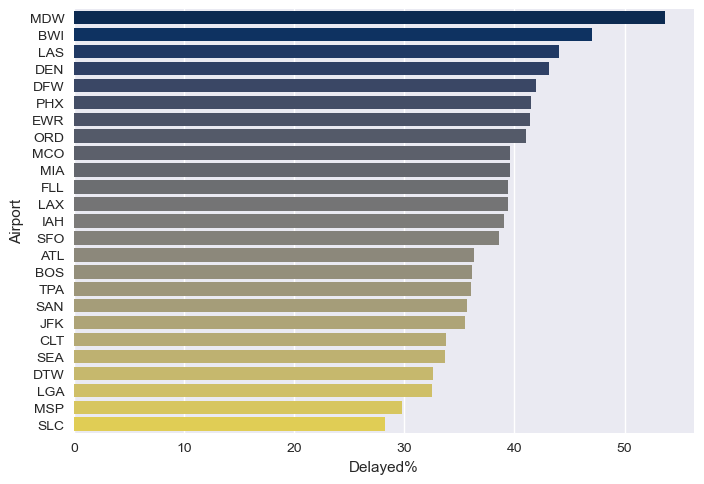

In [489]:
# plot chart of top largest airports based on percentage of delays.

df = df_LargeAirportsFinal
splot = sns.barplot(data=df, x="Delayed%", y="Airport", palette='cividis', order=df.sort_values\
            ('Delayed%',ascending = False).Airport)

<Axes: xlabel='DelayTimeAve', ylabel='Airport'>

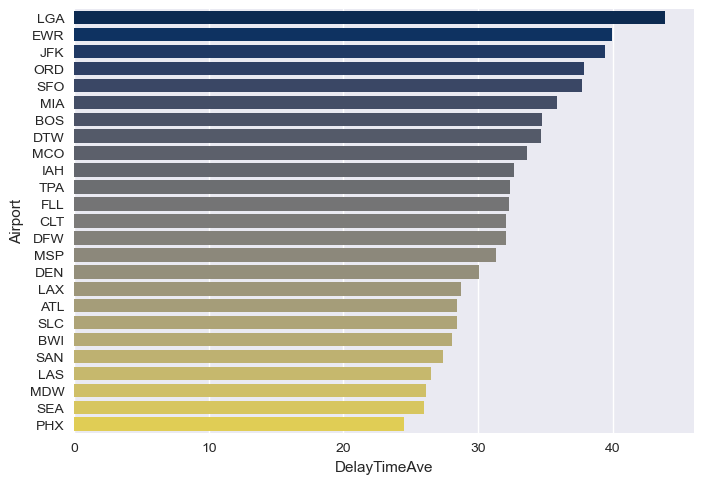

In [490]:
# plot chart of top largest airports based on the average time of delays (all years).

df = df_LargeAirportsFinal
sns.barplot(data=df, x="DelayTimeAve", y="Airport", palette='cividis', order=df.sort_values\
            ('DelayTimeAve',ascending = False).Airport)

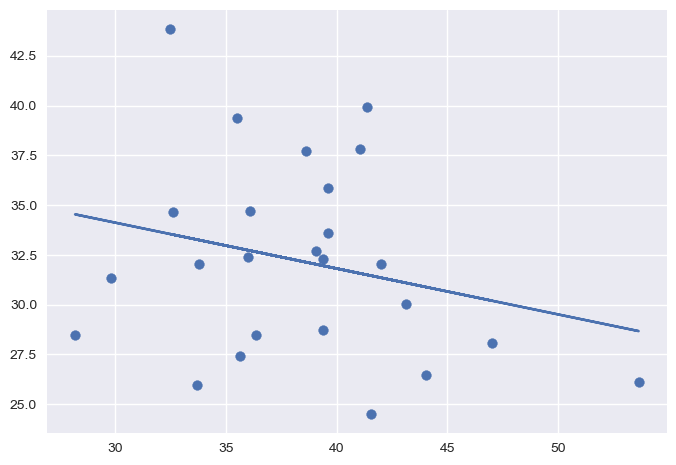

In [418]:
# Check for any relationship between the percentage of flight delays and the actual level of delay,
  # on a major airport basis. The scatterplot of the sample indicates no significant relationship.

plt.scatter(df_LargeAirportsFinal["Delayed%"], df_LargeAirportsFinal["DelayTimeAve"])
z = np.polyfit(df_LargeAirportsFinal["Delayed%"], df_LargeAirportsFinal["DelayTimeAve"], 1)
p = np.poly1d(z)
plt.plot(df_LargeAirportsFinal["Delayed%"], p(df_LargeAirportsFinal["Delayed%"]))
plt.show()

In [386]:
df_AirlinesVis2 = df_AirlinesVis1.drop(df_AirlinesVis1.columns[[0, 1]],axis = 1)

In [375]:
df = pd.DataFrame(df_AirlinesVis1)

In [387]:
df_AirlinesVis2

,Airline,Year,FlightCount,DelayN,Delayed%,DelayTimeAve
0,AA,2010,5527,2070,37.0,31.0
1,AA,2011,5485,2049,37.0,30.0
2,AA,2012,5282,2018,38.0,31.0
3,AA,2013,5410,2276,42.0,29.0
4,AA,2014,5530,2159,39.0,35.0
...,...,...,...,...,...,...
100,WN,2016,13384,5674,42.0,24.0
101,WN,2017,13814,6413,46.0,25.0
102,WN,2018,13900,6819,49.0,25.0
103,WN,2019,13972,6343,45.0,24.0


In [430]:
df = pd.DataFrame(df_AirlinesVis3)
df_AirlinesVis3

,index,Airline,Year,FlightCount,DelayN,Delayed%,DelayTimeAve
0,0,AA,2010,5527,2070,37.0,31.0
1,1,AA,2011,5485,2049,37.0,30.0
2,2,AA,2012,5282,2018,38.0,31.0
3,3,AA,2013,5410,2276,42.0,29.0
4,4,AA,2014,5530,2159,39.0,35.0
...,...,...,...,...,...,...,...
100,100,WN,2016,13384,5674,42.0,24.0
101,101,WN,2017,13814,6413,46.0,25.0
102,102,WN,2018,13900,6819,49.0,25.0
103,103,WN,2019,13972,6343,45.0,24.0


In [432]:
df_AirlinesVis3 = df_AirlinesVis3.drop(df_AirlinesVis1.columns[[1]],axis = 1)

In [433]:
df_AirlinesVis3

,Airline,Year,FlightCount,DelayN,Delayed%,DelayTimeAve
0,AA,2010,5527,2070,37.0,31.0
1,AA,2011,5485,2049,37.0,30.0
2,AA,2012,5282,2018,38.0,31.0
3,AA,2013,5410,2276,42.0,29.0
4,AA,2014,5530,2159,39.0,35.0
...,...,...,...,...,...,...
100,WN,2016,13384,5674,42.0,24.0
101,WN,2017,13814,6413,46.0,25.0
102,WN,2018,13900,6819,49.0,25.0
103,WN,2019,13972,6343,45.0,24.0


In [434]:
# Group data by airline, by year.

df_AirlinesVis3 = df_AirlinesVis3.groupby(['Airline', 'Year']).aggregate(
    {'FlightCount': 'sum', 'DelayN': 'sum', 'Delayed%': 'mean', 'DelayTimeAve':'mean'})
df_AirlinesVis3

FlightCount  DelayN  Delayed%  DelayTimeAve
Airline Year                                             
AA      2010         5527    2070      37.0          31.0
        2011         5485    2049      37.0          30.0
        2012         5282    2018      38.0          31.0
        2013         5410    2276      42.0          29.0
        2014         5530    2159      39.0          35.0
...                   ...     ...       ...           ...
WN      2016        13384    5674      42.0          24.0
        2017        13814    6413      46.0          25.0
        2018        13900    6819      49.0          25.0
        2019        13972    6343      45.0          24.0
        2020         3504     978      27.0          19.0

[105 rows x 4 columns]

In [435]:
# Save to file for potential visualization use outside of Python.

df_AirlinesVis3.to_csv('AirlinesDAT2.csv')

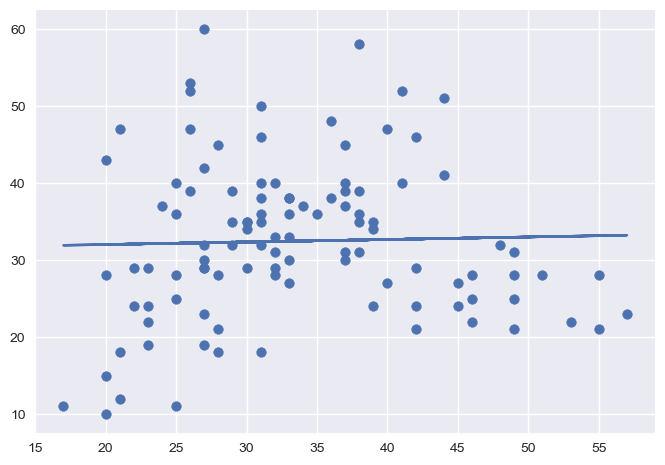

In [417]:
# Check for any relationship between the percentage of flight delays and the actual level of delay,
  # on a major airline basis. The scatterplot of the sample indicates no significant relationship.

plt.scatter(df_AirlinesVis3["Delayed%"], df_AirlinesVis3["DelayTimeAve"])
z = np.polyfit(df_AirlinesVis3["Delayed%"], df_AirlinesVis3["DelayTimeAve"], 1)
p = np.poly1d(z)
plt.plot(df_AirlinesVis3["Delayed%"], p(df_AirlinesVis3["Delayed%"]))
plt.show()

In [394]:
# Drop grouping by year and average all amounts.

df_AirlinesVis4 = df_AirlinesVis3.groupby(['Airline']).aggregate(
    {'FlightCount': 'sum', 'DelayN': 'sum', 'Delayed%': 'mean', 'DelayTimeAve':'mean'})
df_AirlinesVis4
df_AirlinesVis4.round(decimals = 0)

,FlightCount,DelayN,Delayed%,DelayTimeAve
Airline,,,,
AA,74945,26438,35.0,34.0
AS,18837,4933,25.0,27.0
B6,27304,10466,37.0,42.0
DL,89586,28275,31.0,31.0
F9,10047,4036,39.0,36.0
HA,8068,1992,24.0,16.0
NK,8647,2887,33.0,42.0
OO,69880,20090,28.0,42.0
UA,53647,20713,37.0,36.0


In [395]:
df = pd.DataFrame(df_AirlinesVis4)

In [411]:
# fix indexing

df_AirlinesVis5

,Airline,FlightCount,DelayN,Delayed%,DelayTimeAve
0,AA,74945,26438,34.909091,34.090909
1,AS,18837,4933,25.090909,26.909091
2,B6,27304,10466,36.727273,41.545455
3,DL,89586,28275,30.636364,30.818182
4,F9,10047,4036,39.000000,36.272727
5,HA,8068,1992,23.727273,16.000000
6,NK,8647,2887,32.666667,41.500000
7,OO,69880,20090,27.909091,42.363636
8,UA,53647,20713,36.727273,35.636364
9,WN,130782,64297,47.545455,23.545455


In [412]:
df = pd.DataFrame(df_AirlinesVis5)

In [413]:
df_AirlinesVis5.round(decimals = 0)

,Airline,FlightCount,DelayN,Delayed%,DelayTimeAve
0,AA,74945,26438,35.0,34.0
1,AS,18837,4933,25.0,27.0
2,B6,27304,10466,37.0,42.0
3,DL,89586,28275,31.0,31.0
4,F9,10047,4036,39.0,36.0
5,HA,8068,1992,24.0,16.0
6,NK,8647,2887,33.0,42.0
7,OO,69880,20090,28.0,42.0
8,UA,53647,20713,37.0,36.0
9,WN,130782,64297,48.0,24.0


In [414]:
df_AirlinesVis5.to_csv('AirlinesDAT3.csv')

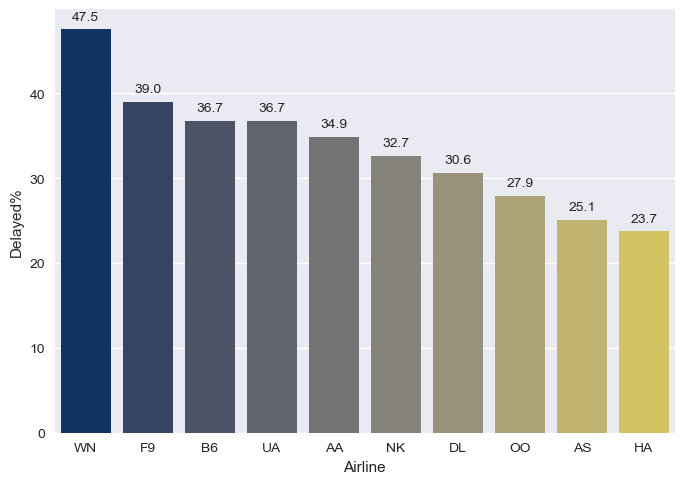

In [460]:
splot = sns.barplot(data=df_AirlinesVis5, x="Airline", y="Delayed%", palette='cividis', order=df_AirlinesVis5.sort_values\
            ("Delayed%",ascending = False).Airline)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

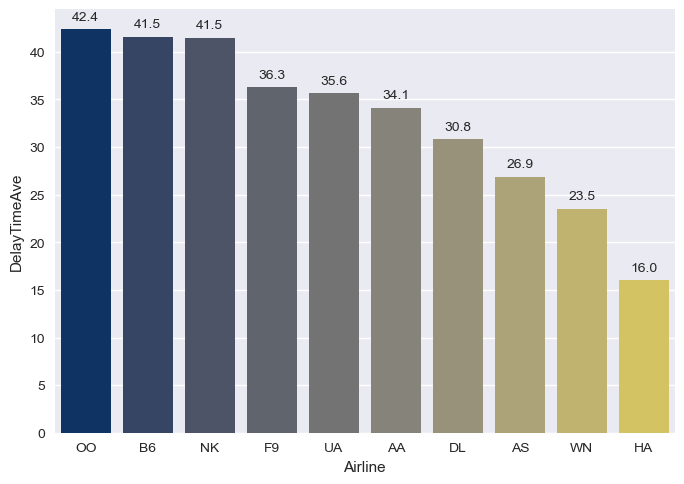

In [458]:
splot = sns.barplot(data=df_AirlinesVis5, x="Airline", y="DelayTimeAve",  palette='cividis', order=df_AirlinesVis5.sort_values\
            ('DelayTimeAve',ascending = False).Airline)
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

In [474]:
df_AirlinesVis6 = df_AirlinesVis3.reset_index()

In [475]:
df_AirlinesVis6

,Airline,Year,FlightCount,DelayN,Delayed%,DelayTimeAve
0,AA,2010,5527,2070,37.0,31.0
1,AA,2011,5485,2049,37.0,30.0
2,AA,2012,5282,2018,38.0,31.0
3,AA,2013,5410,2276,42.0,29.0
4,AA,2014,5530,2159,39.0,35.0
...,...,...,...,...,...,...
100,WN,2016,13384,5674,42.0,24.0
101,WN,2017,13814,6413,46.0,25.0
102,WN,2018,13900,6819,49.0,25.0
103,WN,2019,13972,6343,45.0,24.0


In [479]:
df = pd.DataFrame(df_AirlinesVis6)

In [482]:
df_AirlinesVis7 = df_AirlinesVis6.drop(df_AirlinesVis6.columns[[0]],axis = 1)

In [483]:
df_AirlinesVis7

,Year,FlightCount,DelayN,Delayed%,DelayTimeAve
0,2010,5527,2070,37.0,31.0
1,2011,5485,2049,37.0,30.0
2,2012,5282,2018,38.0,31.0
3,2013,5410,2276,42.0,29.0
4,2014,5530,2159,39.0,35.0
...,...,...,...,...,...
100,2016,13384,5674,42.0,24.0
101,2017,13814,6413,46.0,25.0
102,2018,13900,6819,49.0,25.0
103,2019,13972,6343,45.0,24.0


In [484]:
df = pd.DataFrame(df_AirlinesVis7)

<Axes: xlabel='Year', ylabel='Delayed%'>

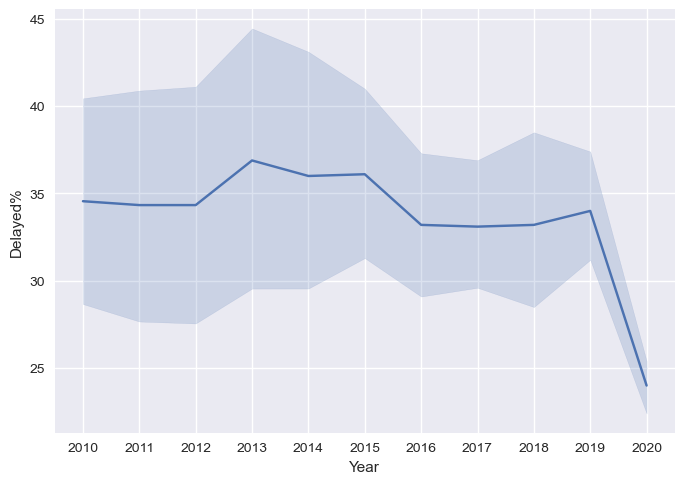

In [487]:
# Trend over the reviewed timeframe of the change in percentage of delayed flights. Not much change (note: 2020
# was not a full year of data).

df_AirlinesVis7['Year'] = (df_AirlinesVis7['Year']).astype(str)
sns.lineplot(data=df_AirlinesVis7, x="Year", y="Delayed%")

<Axes: xlabel='Year', ylabel='DelayTimeAve'>

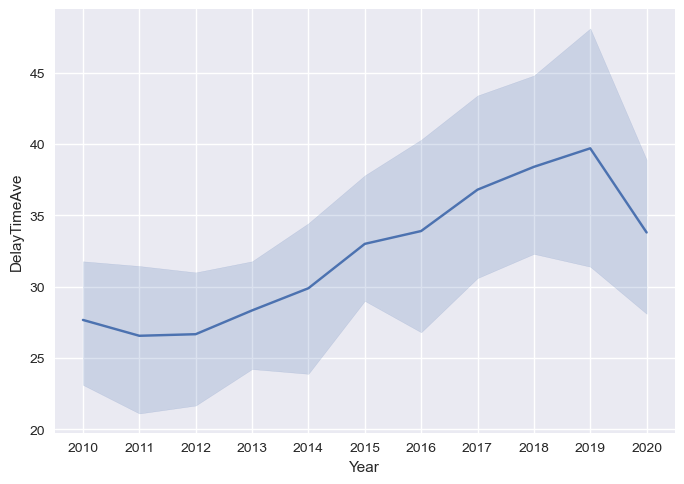

In [492]:
# Trend over the reviewed timeframe of the change in the average minutes of delay when a delay occurs
# (flights where there was no delay were excluded from the dataset). Delays did trend upward over the 
# timeframe -- from about 28 minutes to just under 40 minute (ignoring 2020 which was not a full year of data).

sns.lineplot(data=df_AirlinesVis7, x="Year", y="DelayTimeAve")

## Core Insights

### Core insights from the dataset include:

1.   On a system-wide basis, the percentage of flights delayed has hovered near 35%, which suggests that the number
     of delays relative to the number of flights has not worsened significantly.

2.   When delays occur, the level of delay minutes have risen from an average of about 28 minutes in 2010,
     to nearly 40 minutes in 2019. That's a significant 30% increase.

3.  Three of the largest and most fequently-used Airlines - American (AA), Delta (DL), and United (UA) -
    did not have the worst performance in terms of delayed flights and delay times. Southwest (WN) had the most
    delayed flights (nearly 48%), but was among the lowest in delay minutes.

4. Skywest (OO) had the worst delay time minutes (42), but had among the fewest delayed flights at 28%.

5. Eight major airports exceeded 40% of flights delayed, with Chicago Midway (MDW) exceeding 50%.

6.  Fifteen major aiports exceeded a 30 minutes delay time, with the three worst being in the NYC metro
    area - Kennedy (JFK), Newark (EWR), and LaGuardia (LGA). LaGuardia had the worst delay time minutes, 
    at an average of more than 40 minutes.

7.  As there is no significant relationship between the percentage of flights delayed and the number of delay minutes,
    consumers who are concerned about the length of any potential delay should not base flight decisions solely on
    which airline and/or airport has a relative higher percentage of delayed flights.

8.  Consumers who are concerned about delay lengths should focus on delay minutes by airport and airline. Delay
    minutes among the largest airlines range between 24 minutes for Southwest and 36 minutes for United. This may not,
    however, be enough of a spread upon which to base a flight decision. This same dynamic also exists for
    major airports, where delay minutes between the largest airports range from 30 to 45 minutes, 
    just a 15 minute difference.